# Ciencia de datos aplicada

## Taller 7

### Contexto

#### Linear Programming Model  

Every LP model is composed of 
* __Decision variables__ (whose values are unknown and are searched for)
* __Objective function__ (a linear mathematical function that relates the decision variables to the goal, measures goal attainment, and is to be optimized)
* __Objective function coefficients__ (unit profit or cost coefficients indicating the contribution to the objective of one unit of a decision variable)
* __Constraints__ (expressed in the form of linear inequalities or equalities that limit resources and/or requirements; these relate the variables through linear relationships), 
* __Capacities__(which describe the upper and sometimes lower limits on the constraints and variables), 
* __Input/Output__ (technology) coefficients (which indicate resource utilization for a decision variable).

Tomado de https://www.amazon.com/-/es/Ramesh-Sharda/dp/0134633288  Pg 339


### 1. Definición de librerías y archivos

In [1]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog


### 2.Definición del problema
Veamos un ejemplo. MBL Corporation, que fabrica computadoras para propósitos especiales, necesita tomar una decisión: ¿Cuántas computadoras debería producir el próximo mes en la planta de Boston? MBL está considerando dos tipos de computadoras: 

la CC-7, que requiere 300 días de mano de obra y $ 10,000 en materiales, 

y la CC-8, que requiere 500 días de mano de obra y $ 15,000 en materiales. 

La contribución a las ganancias de cada CC-7 es de \\$ 8,000, mientras que la de cada CC-8 de \\$ 12,000. 

La planta tiene una capacidad de 200,000 días hábiles por mes y el presupuesto de materiales es de $ 8 millones por mes. 

El marketing requiere que se produzcan al menos 100 unidades del CC-7 y al menos 200 unidades del CC-8 cada mes. 

El problema es maximizar las ganancias de la empresa determinando cuántas unidades del CC-7 y cuántas unidades del CC-8 deben producirse cada mes. Tenga en cuenta que en un entorno del mundo real, posiblemente podría llevar meses 10 obtener los datos en el enunciado del problema, y mientras recopila los datos, el tomador de decisiones sin duda descubriría hechos sobre cómo estructurar el modelo 10. Las herramientas basadas en la web para recopilar datos pueden ayudar.

![title](grafico_lp.png)


### 2.1. Variables de decisión(decision variables)

$X_1=$ Unidades de CC-7 a producir

$X_2=$ Unidades de CC-8 a producir

### 2.2. Variable de resultado 

$Z=$ Ganancia de la empresa

El objetivo es maximizar la función de ganacia

$Z=8,000X_1+12,000X_2$

### 2.3. Restricciones del modelo
* $ 300X_1 + 500X_2 \leq 200,000 $ Restricción de trabajo
* $ 10,000X_1 + 15,000X_2 \leq 8,000.000 $ Restricción de presupuesto
* $X_1\geq100$ 
* $X_2\geq200$


\begin{equation}
\begin{bmatrix}
300 & 500 \\
10,000 & 15,000 \\
\end{bmatrix}
\begin{bmatrix}
X_1 \\
X_2 \\
\end{bmatrix}
\leq
\begin{bmatrix}
200,000 \\
8,000.000 \\
\end{bmatrix}
\end{equation}


Estas ecuacuaciones se pueden representar en un plano cartesiano que va a permitir tener una mejor perspectiva de la ecuación

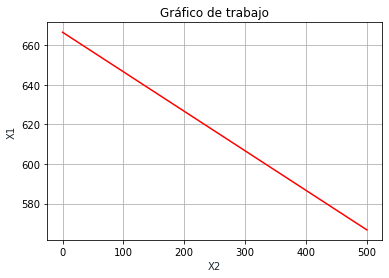

In [11]:
## Restricción de trabajo
# Recalculamos la ecuación
x2t = np.linspace(0,500,100)
x1t = (200000/300) - (500/300)*x2
plt.plot(x2t, x1t, '-r')
plt.title('Gráfico de trabajo')
plt.xlabel('X2', color='#1C2833')
plt.ylabel('X1', color='#1C2833')
plt.grid()
plt.show()

Podemos encontrar los puntos de corte de la ecuación igualando a 0 cualquiera de las dos variables $X_1,X_2$

Si $X_1=0 \rightarrow X_2 \leq 400$ 

Si $X_2=0 \rightarrow X_1 \leq 666.66$ 



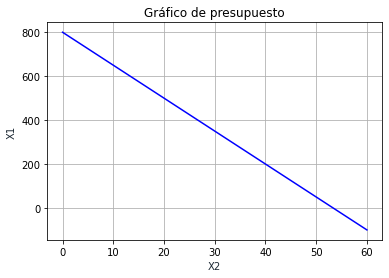

In [10]:
## Restricción de presupuesto
# Recalculamos la ecuación
x2p = np.linspace(0,60,100)
x1p = (8000000/10000) -(150000/10000)*x2
plt.plot(x2p, x1p, '-b')
plt.title('Gráfico de presupuesto')
plt.xlabel('X2', color='#1C2833')
plt.ylabel('X1', color='#1C2833')
plt.grid()
plt.show()

Podemos encontrar los puntos de corte de la ecuación igualando a 0 cualquiera de las dos variables $X_1,X_2$

Si $X_1=0 \rightarrow X_2 \leq 53.33$ 

Si $X_2=0 \rightarrow X_1 \leq 800$ 


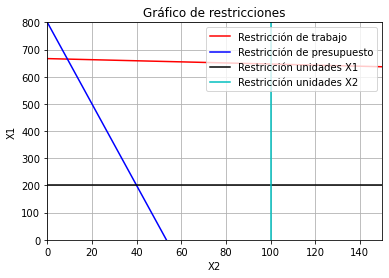

In [41]:
# Graficamos además las restricciones de unidades
plt.plot(x2t, x1t,'-r', label = "Restricción de trabajo")
plt.plot(x2p, x1p,'-b', label = "Restricción de presupuesto")
plt.axhline(y=200,color='k', linestyle='-', label='Restricción unidades X1')
plt.axvline(x=100,color='c', linestyle='-', label='Restricción unidades X2')
plt.xlabel('X2')
# Set the y axis label of the current axis.
plt.ylabel('X1')
# Set a title of the current axes.
plt.title('Gráfico de restricciones')
# show a legend on the plot
plt.grid()
plt.xlim([0, 150])
plt.ylim([0, 800])
plt.legend(loc=1)
plt.show()

### 3. Solución del problema a través del código
Para minimizar o maximizar la función se utiliza la función de scypy [linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)

* __c__ : es el vector de pesos o coeficientes de la funcion costo.
* __A_ub__: es la matriz de coeficientes para el sistema de restricciones “menos que”.
* __b_ub__: es el vector de coeficientes libres en el sistema de ecuaciones.
* __A_eq (opcional):__ es la matriz de coeficientes para el sistema de restricciones “igual que”.
* __b_eq (opcional):__es el vector de coeficientes libres en el sistema de ecuaciones de igualdad.
* __bounds(opcional):__ lista de tuplas(min,max) para cada variable x
* __method:__ cadena de texto del metodo a utilizar y tenemos 3 opciones
    * __‘interior-point’__ (en defecto)
    * __‘revised simplex’__ (recomendado)
    * __‘simplex’__ (obsoleto)
* __x0:__ valores inciciales para inciar el proceso iterativo

Recordemos:

\begin{equation}
\begin{bmatrix}
300 & 500 \\
10,000 & 15,000 \\
\end{bmatrix}
\begin{bmatrix}
X_1 \\
X_2 \\
\end{bmatrix}
\leq
\begin{bmatrix}
200,000 \\
8,000.000 \\
\end{bmatrix}
\end{equation}


In [69]:
#la función linprog solamente minimiza por lo que hay que cambiar el signo de la función de costo
c = np.array([-8000, -12000]) # Coeficientes de la funcion costo
A = np.array([[300,500],[10000,15000]]) # coeficientes de la matriz
b = np.array([200000,8000000]) # coeficientes libres
bounds=np.array([[200, None],[100,None]])# Límites de las variables x

In [70]:
#Construimos la función
res = linprog(c=c, # Función de costo
              A_ub=A, #Matriz
              b_ub=b, #Coeficientes libres
              bounds=bounds, #límites de x              
              method="revised simplex" #método
             )

In [71]:
# mostramos la estrucutra OptimizedResult
print(res)  

     con: array([], dtype=float64)
     fun: -5200000.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([      0., 1500000.])
  status: 0
 success: True
       x: array([500., 100.])


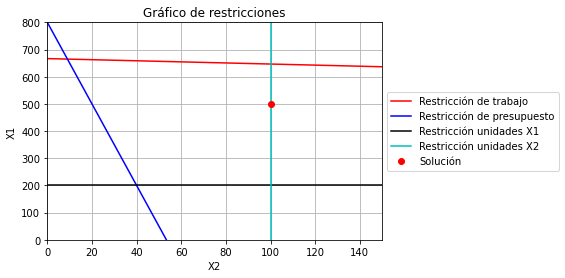

In [76]:
# Graficamos además las restricciones de unidades
plt.plot(x2t, x1t,'-r', label = "Restricción de trabajo")
plt.plot(x2p, x1p,'-b', label = "Restricción de presupuesto")
plt.axhline(y=200,color='k', linestyle='-', label='Restricción unidades X1')
plt.axvline(x=100,color='c', linestyle='-', label='Restricción unidades X2')
plt.plot(res['x'][1],res['x'][0],"ro", label='Solución')
plt.xlabel('X2')
# Set the y axis label of the current axis.
plt.ylabel('X1')
# Set a title of the current axes.
plt.title('Gráfico de restricciones')
# show a legend on the plot
plt.grid()
plt.xlim([0, 150])
plt.ylim([0, 800])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 4. Ejemplo

Maximizar:

$z=2X_1+3X_2$
    
Restricciones:

$X_1 + X_2\leq 10$

$2X_1 + X_2\leq 15$

$X_1,X_2\geq0$

Expresión matricial:

\begin{equation}
\begin{bmatrix}
1 & 1 \\
2 & 1 \\
\end{bmatrix}
\begin{bmatrix}
X_1 \\
X_2 \\
\end{bmatrix}
\leq
\begin{bmatrix}
10 \\
15 \\
\end{bmatrix}
\end{equation}













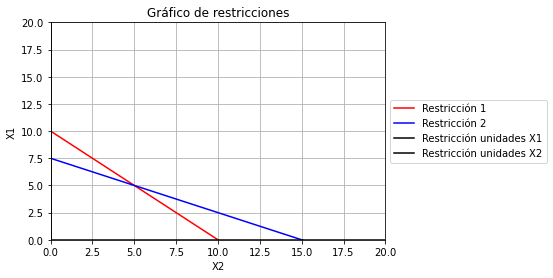

In [78]:
#Graficar las funciones
# Graficamos además las restricciones de unidades
x2 = np.linspace(0,100,100)
x11=10-x2
x12=(15/2)-(1/2)*x2
plt.plot(x2, x11,'-r', label = "Restricción 1")
plt.plot(x2, x12,'-b', label = "Restricción 2")
plt.axhline(y=0,color='k', linestyle='-', label='Restricción unidades X1')
plt.axvline(x=0,color='k', linestyle='-', label='Restricción unidades X2')
plt.xlabel('X2')
# Set the y axis label of the current axis.
plt.ylabel('X1')
# Set a title of the current axes.
plt.title('Gráfico de restricciones')
# show a legend on the plot
plt.grid()
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [79]:
# Solución
#la función linprog solamente minimiza por lo que hay que cambiar el signo de la función de costo
c = np.array([-2, -3]) # Coeficientes de la funcion costo
A = np.array([[1,1],[2,1]]) # coeficientes de la matriz
b = np.array([10,15]) # coeficientes libres
bounds=np.array([[0, None],[0,None]])# Límites de las variables x

In [80]:
#Construimos la función
res2 = linprog(c=c, # Función de costo
              A_ub=A, #Matriz
              b_ub=b, #Coeficientes libres
              bounds=bounds, #límites de x              
              method="revised simplex" #método
             )

In [81]:
print(res2)

     con: array([], dtype=float64)
     fun: -30.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([0., 5.])
  status: 0
 success: True
       x: array([ 0., 10.])


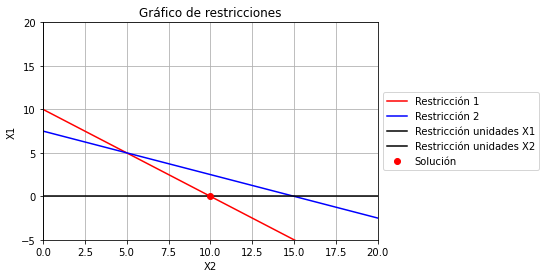

In [84]:
#Graficar las funciones
# Graficamos además las restricciones de unidades
x2 = np.linspace(0,100,100)
x11=10-x2
x12=(15/2)-(1/2)*x2
plt.plot(x2, x11,'-r', label = "Restricción 1")
plt.plot(x2, x12,'-b', label = "Restricción 2")
plt.axhline(y=0,color='k', linestyle='-', label='Restricción unidades X1')
plt.axvline(x=0,color='k', linestyle='-', label='Restricción unidades X2')
plt.plot(res2['x'][1],res2['x'][0],"ro", label='Solución')
plt.xlabel('X2')
# Set the y axis label of the current axis.
plt.ylabel('X1')
# Set a title of the current axes.
plt.title('Gráfico de restricciones')
# show a legend on the plot
plt.grid()
plt.xlim([0, 20])
plt.ylim([-5, 20])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### Extensión

Resuelva el siguiente ejercicio:

Let us assume that a Hospital has different departments and only four surgical departments performing different surgery. The performance of these surgeries is constrained by four resources: 
* (i). Waiting room (WR) hours 
* (ii).Operating Room (OR) hours 
* (iii). Recovery room (RR) bed hours and 
* (iv). Surgical services (SS). 

The capacity hours of WR, OR, RR and SS are 750 hours, 1000 hours, 1300 hours and 630 hours respectively for performing the different surgeries. 

Now, the director of the hospital is in a position to determine the optimal combination of surgical patients that maximizes the profit contributed by Patients with different surgeries (S_1,S_2,S_3,S_4)

The constraints are:

|    | $S_1$ | $S_2$ | $S_3$ | $S_4$ |
|----|-------|-------|-------|-------|
| WR | 5     | 7     | 9     | 4     |
| OR | 4     | 6     | 5     | 7     |
| RR | 3     | 5     | 4     | 6     |
| SS | 6     | 3     | 2     | 5     |

Let the average contribution to profit by $S_1, S_2, S_3, S_4$ patients are \\$20, \\$22, \\$21 and \\$19 respectively. Thus in order to determine the optimal combination of surgical patients that maximizes the total profit contributed by Patients with different surgeries. 


#### Preguntas

1. Establezca las variables del problema
2. Cree las ecuaciones
3. Represente el sistema matricial
4. Grafique al menos 2 de las cirugías
5. Cree el programa linprog y halle la solución



